Group 19 <br>
Khalil Zayed, 100672228 <br>
Fajer Zayed, 100672347

# Handwritten Digit Recognition

### Introduction

This document contains information relative to the design and implementation of a handwritten digit recognition deep learning model.
#### Objectives: 
1. Develop a deep learning model that can learn through images to predict handwritten digits.
2. Use the MNIST database to train the model and test it for accuracy.
3. Develop a user interface that allows the user to draw a digit as an input.
4. Preprocess the image drawn by user and use the model to predict the digit.

### Model Design

#### Libraries
A brief description about the libraries used and the its uses:
- Keras: deep learning library for artificial neural networks
- MNIST: handwritten digit database used to train and test the model
- Tkinter: python library for building GUI
- numpy: python library used for multi-dimensional arrays
- PIL: python imaging library used to preprocessor image data

In [84]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tkinter import *
import numpy as np
from PIL import ImageTk, Image, ImageDraw
import PIL

#### Preprocessing
- Data is loaded from the MNIST dataset for handwritten digits. For more information: http://yann.lecun.com/exdb/mnist/
- The dataset is divided into two sets, a training set consisting of 60000 images and a testing set consisting of 10000 images.
- Data comes preprocessed and formatted so there is minimal effort that needs to be done before training.

In [85]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#### Model Layers
The sequential model has three layers: 
1. The first layer aims to flatten the data from a two-dimensional (28, 28) input to a one-dimensional (784,) output. 
2. The second layer consists of a dense layer which is a deeply connected neural network. The layer uses a rectified linear unit (ReLU) as the activation function.
3. The last layer consists of a dense layer with 10 nodes representing the 10 possible predictions of the digit. The last layer uses a softmax activation function to produce probability distribution of the possible outcomes.

After the layers are defined, the model is trained using categorical cross entropy loss and the Adam optimization algorithm.

In [86]:
model = Sequential(name="sequential")
model.add(Flatten(name="flatten"))
model.add(Dense(150, activation='relu', name="dense_150"))
model.add(Dense(10, activation='softmax', name="dense_10"))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

model.fit(x_train, y_train,epochs=10,batch_size=128)
model.summary()

Epoch 1/10
469/469 [==============================] - 1s 817us/step - loss: 0.5865 - accuracy: 0.8363
Epoch 2/10
469/469 [==============================] - 0s 774us/step - loss: 0.1645 - accuracy: 0.9534
Epoch 3/10
469/469 [==============================] - 0s 767us/step - loss: 0.1136 - accuracy: 0.9680
Epoch 4/10
469/469 [==============================] - 0s 754us/step - loss: 0.0867 - accuracy: 0.9764
Epoch 5/10
469/469 [==============================] - 0s 810us/step - loss: 0.0687 - accuracy: 0.9803
Epoch 6/10
469/469 [==============================] - 0s 784us/step - loss: 0.0560 - accuracy: 0.9845
Epoch 7/10
469/469 [==============================] - 0s 791us/step - loss: 0.0457 - accuracy: 0.9871
Epoch 8/10
469/469 [==============================] - 0s 810us/step - loss: 0.0381 - accuracy: 0.9890
Epoch 9/10
469/469 [==============================] - 0s 795us/step - loss: 0.0297 - accuracy: 0.9921
Epoch 10/10
469/469 [==============================] - 0s 788us/step - loss: 0.025

### Graphical User Interface
- In the last step, the graphical user interface is developed allowing the user to draw a digit in the space provided and using the model to classify the digit. 
- Before the image is supplied to the model, it has to be preprocessed into a (28, 28) greyscale image and normalized to 0-1.
- The user interface will display the prediction with the highest percentage that is returned by the model and the accuracy. 
- In case the model does not predict the digit correctly, there is a second guess that it can give which represents the second highest percentage that the model returned.

In [87]:

import matplotlib.pyplot as plt

height = 500
width = 500

def draw_digit(event):
    x = event.x
    y = event.y
    delta = 10
    canvas.create_oval(x-delta, y-delta, x+delta, y+delta, fill="black")
    draw.line([x-delta, y-delta, x+delta, y+delta],fill="black")

def clear():
    canvas.delete("all")
    draw.rectangle((0, 0, height, width), fill=(255, 255, 255))
    
def predict():
    image = output_image.resize((28,28))
    image = image.convert('L')
    #image.show()
    image = np.array(image)
    image = image.reshape(1,28,28)
    image = image/255.0
    image = 1 - image
    prediction = model.predict([image])[0]
    #print(prediction)
    answer = np.argmax(prediction)
    percent = int(max(prediction)*100)
    list2 = np.delete(prediction, answer)
    second_guess = max(list2)
    
    prediction_label.configure(text = str(answer) + "\n" + str(percent) + "%\n" + str(np.where(prediction == second_guess)[0][0]))

master = Tk()
canvas = Canvas(master, width = width, height = height, bg = "white")
canvas.pack()
answer_label = Label(master, text="Digit: \nAccuracy: \nSecond guess:", font=("Arial", 40))
prediction_label = Label(master, text="", font=("Arial", 40))
predict_button = Button(master, text = "Predict", command = predict)
clear_button = Button(master, text = "Clear", command = clear)

output_image = PIL.Image.new("RGB", (width, height), (255, 255, 255))
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)

canvas.grid(row=1, column=0, pady=5, padx=5)
answer_label.grid(row=1, column=1,pady=2, padx=2)
prediction_label.grid(row=1, column=2,pady=2, padx=2)
predict_button.grid(row=0, column=0, pady=5, padx=5)
clear_button.grid(row=0, column=1, pady=5, padx=5)

canvas.bind("<B1-Motion>", draw_digit)

master.mainloop()


Consider rewriting this model with the Functional API.


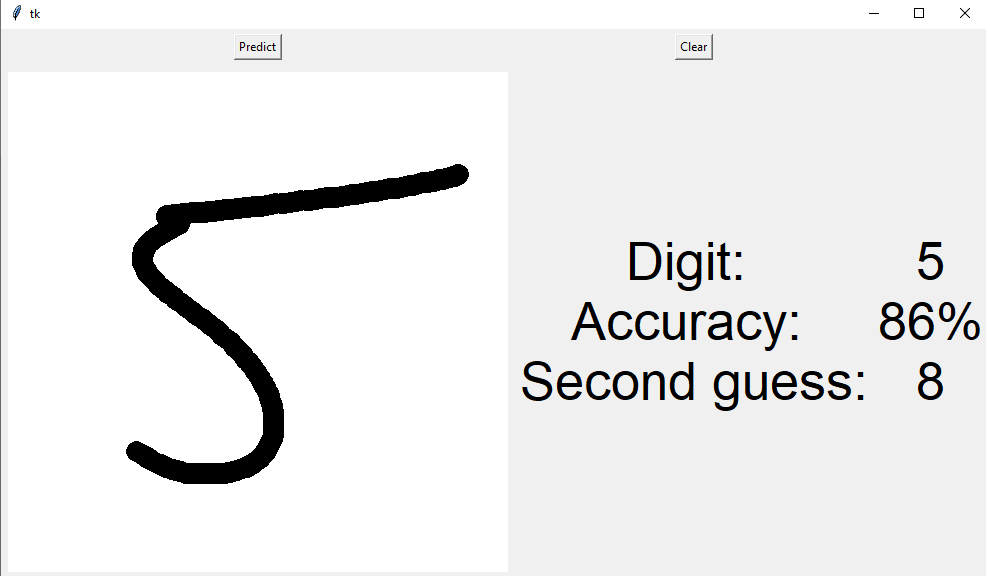

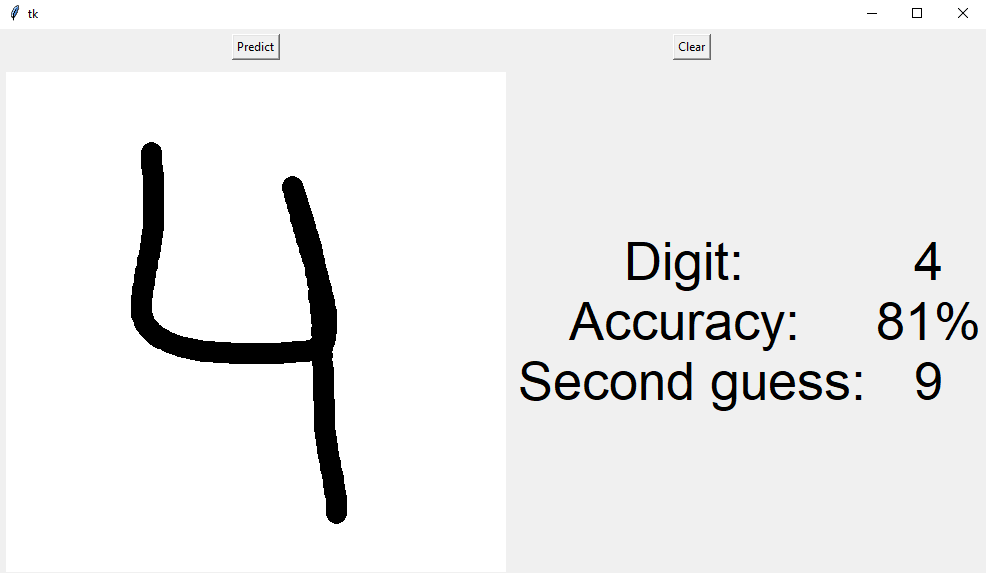

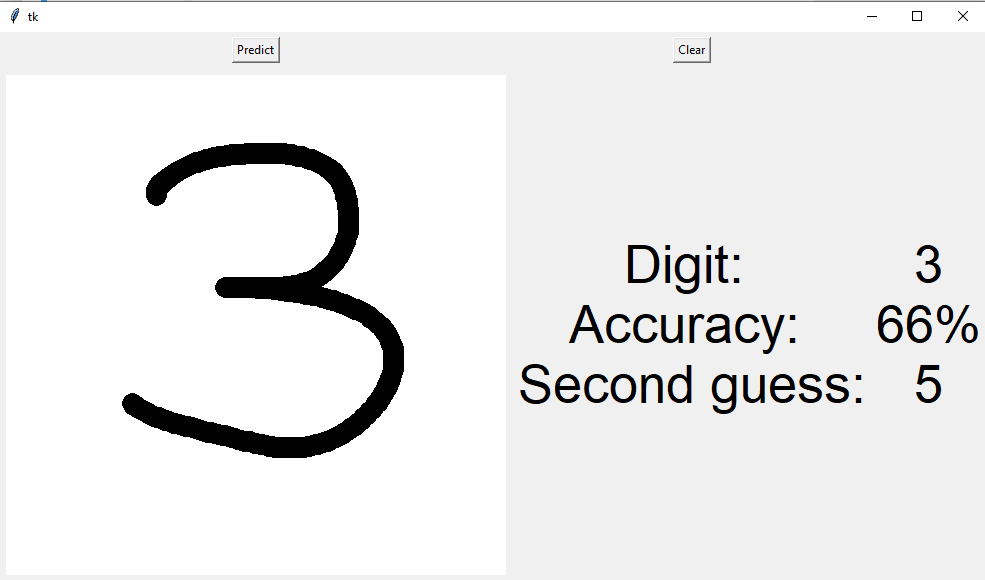